In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Importing the Dataset

In [56]:
dataset = pd.read_excel("Flights.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#Taking care of Null Values

In [57]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#Getting Insights from the Data using the categorical data

Airline vs Price

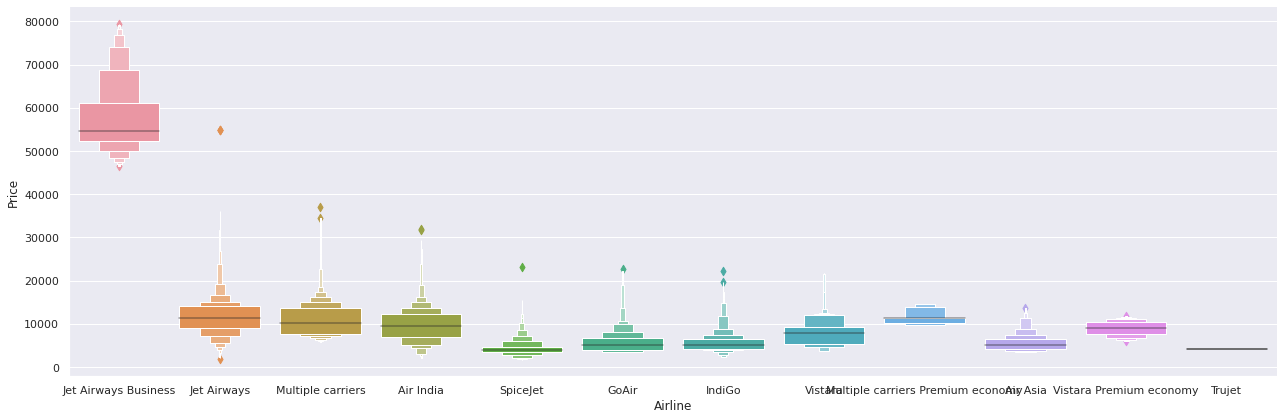

In [58]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Source vs Price

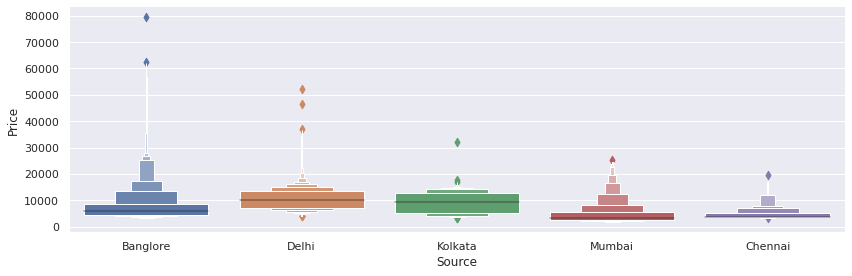

In [59]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

#Dividing the dataset

In [60]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [61]:
X

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [62]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

#Splitting into Training and Testing dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [64]:
print(X_test["Airline"].value_counts())

Jet Airways                          1259
IndiGo                                668
Air India                             613
Multiple carriers                     396
SpiceJet                              253
Vistara                               173
Air Asia                              123
GoAir                                  71
Multiple carriers Premium economy       2
Jet Airways Business                    2
Vistara Premium economy                 1
Name: Airline, dtype: int64


In [65]:
print(X_train["Airline"].value_counts())

Jet Airways                          2590
IndiGo                               1385
Air India                            1138
Multiple carriers                     800
SpiceJet                              565
Vistara                               306
Air Asia                              196
GoAir                                 123
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 2
Trujet                                  1
Name: Airline, dtype: int64


#EDA

In [66]:
X_train["Journey_day"] = pd.to_datetime(X_train.Date_of_Journey, format="%d/%m/%Y").dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
X_train["Journey_month"] = pd.to_datetime(X_train.Date_of_Journey, format="%d/%m/%Y").dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
7959,Jet Airways,1/06/2019,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 02 Jun,5h 35m,1 stop,In-flight meal not included,1,6
933,Air India,09/03/2019,Banglore,New Delhi,BLR → CCU → DEL,05:50,22:45,16h 55m,1 stop,No info,9,3
7604,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 22 Mar,20h 25m,1 stop,No info,21,3
3125,Air India,6/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,6,4
2738,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1 stop,No info,27,5


Droping the Date of Journey column as it is of no use

In [69]:
X_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
X_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
7959,Jet Airways,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 02 Jun,5h 35m,1 stop,In-flight meal not included,1,6
933,Air India,Banglore,New Delhi,BLR → CCU → DEL,05:50,22:45,16h 55m,1 stop,No info,9,3
7604,Jet Airways,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 22 Mar,20h 25m,1 stop,No info,21,3
3125,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,6,4
2738,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1 stop,No info,27,5


In [71]:
# Extracting Hours
X_train["Dep_hour"] = pd.to_datetime(X_train["Dep_Time"]).dt.hour

# Extracting Minutes
X_train["Dep_min"] = pd.to_datetime(X_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
X_train.drop(["Dep_Time"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [72]:
X_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
7959,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 02 Jun,5h 35m,1 stop,In-flight meal not included,1,6,22,50
933,Air India,Banglore,New Delhi,BLR → CCU → DEL,22:45,16h 55m,1 stop,No info,9,3,5,50
7604,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 22 Mar,20h 25m,1 stop,No info,21,3,8,0
3125,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,6,4,20,45
2738,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,12h,1 stop,No info,27,5,9,0


In [73]:
#Extracting Hours
X_train["Arr_hour"] = pd.to_datetime(X_train["Arrival_Time"]).dt.hour

#Extracting Minutes
X_train["Arr_min"] = pd.to_datetime(X_train["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
X_train.drop(["Arrival_Time"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [74]:
X_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
7959,Jet Airways,Delhi,Cochin,DEL → BOM → COK,5h 35m,1 stop,In-flight meal not included,1,6,22,50,4,25
933,Air India,Banglore,New Delhi,BLR → CCU → DEL,16h 55m,1 stop,No info,9,3,5,50,22,45
7604,Jet Airways,Delhi,Cochin,DEL → BOM → COK,20h 25m,1 stop,No info,21,3,8,0,4,25
3125,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,6,4,20,45,23,20
2738,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1 stop,No info,27,5,9,0,21,0


In [75]:
# Assigning and converting Duration column into list
duration = list(X_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [76]:
# Adding duration_hours and duration_mins list to train_data dataframe

X_train["Duration_hours"] = duration_hours
X_train["Duration_mins"] = duration_mins

#Dropping the duration column
X_train.drop(["Duration"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [77]:
X_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
7959,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,1,6,22,50,4,25,5,35
933,Air India,Banglore,New Delhi,BLR → CCU → DEL,1 stop,No info,9,3,5,50,22,45,16,55
7604,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,3,8,0,4,25,20,25
3125,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,6,4,20,45,23,20,2,35
2738,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,27,5,9,0,21,0,12,0


#Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1. **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2. **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [78]:
#As Airline is Nominal Categorical data we will perform OneHotEncoding
#We are using get_dummies here of pandas, so that we can view the change easily

Airline = X_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
7959,0,0,0,1,0,0,0,0,0,0,0
933,1,0,0,0,0,0,0,0,0,0,0
7604,0,0,0,1,0,0,0,0,0,0,0
3125,1,0,0,0,0,0,0,0,0,0,0
2738,0,0,0,0,0,1,0,0,0,0,0


In [79]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = X_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
7959,0,1,0,0
933,0,0,0,0
7604,0,1,0,0
3125,0,0,1,0
2738,0,1,0,0


In [80]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = X_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7959,1,0,0,0,0
933,0,0,0,0,1
7604,1,0,0,0,0
3125,0,0,0,0,0
2738,1,0,0,0,0


In [81]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

X_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
#Here Values are assigned with corresponding keys
#We are doing this the hard way rather than using labelencoder

X_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [83]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

X_train = pd.concat([X_train, Airline, Source, Destination], axis = 1)

In [84]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7959,Jet Airways,Delhi,Cochin,1,1,6,22,50,4,25,5,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
933,Air India,Banglore,New Delhi,1,9,3,5,50,22,45,16,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7604,Jet Airways,Delhi,Cochin,1,21,3,8,0,4,25,20,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3125,Air India,Kolkata,Banglore,0,6,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2738,Multiple carriers,Delhi,Cochin,1,27,5,9,0,21,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [85]:
#Droping the redundant columns
X_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [86]:
X_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7959,1,1,6,22,50,4,25,5,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
933,1,9,3,5,50,22,45,16,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7604,1,21,3,8,0,4,25,20,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3125,0,6,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2738,1,27,5,9,0,21,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [87]:
#Analysing the shape of processed training data

X_train.shape

(7121, 29)

#Working on the Test Set

In [88]:
# Preprocessing
print("Test data Info")
print("-"*75)
print(X_test.info())

print()
print()

print("Null values :")
print("-"*75)
X_test.dropna(inplace = True)
print(X_test.isnull().sum())

# EDA

# Date_of_Journey
X_test["Journey_day"] = pd.to_datetime(X_test.Date_of_Journey, format="%d/%m/%Y").dt.day
X_test["Journey_month"] = pd.to_datetime(X_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
X_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
X_test["Dep_hour"] = pd.to_datetime(X_test["Dep_Time"]).dt.hour
X_test["Dep_min"] = pd.to_datetime(X_test["Dep_Time"]).dt.minute
X_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
X_test["Arrival_hour"] = pd.to_datetime(X_test.Arrival_Time).dt.hour
X_test["Arrival_min"] = pd.to_datetime(X_test.Arrival_Time).dt.minute
X_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(X_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
X_test["Duration_hours"] = duration_hours
X_test["Duration_mins"] = duration_mins
X_test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(X_test["Airline"].value_counts())
Airline = pd.get_dummies(X_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(X_test["Source"].value_counts())
Source = pd.get_dummies(X_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(X_test["Destination"].value_counts())
Destination = pd.get_dummies(X_test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
X_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
X_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
X_test = pd.concat([X_test, Airline, Source, Destination], axis = 1)

X_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", X_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 10507 to 8919
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          3561 non-null   object
 1   Date_of_Journey  3561 non-null   object
 2   Source           3561 non-null   object
 3   Destination      3561 non-null   object
 4   Route            3561 non-null   object
 5   Dep_Time         3561 non-null   object
 6   Arrival_Time     3561 non-null   object
 7   Duration         3561 non-null   object
 8   Total_Stops      3561 non-null   object
 9   Additional_Info  3561 non-null   object
dtypes: object(10)
memory usage: 306.0+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

#Feature Selection

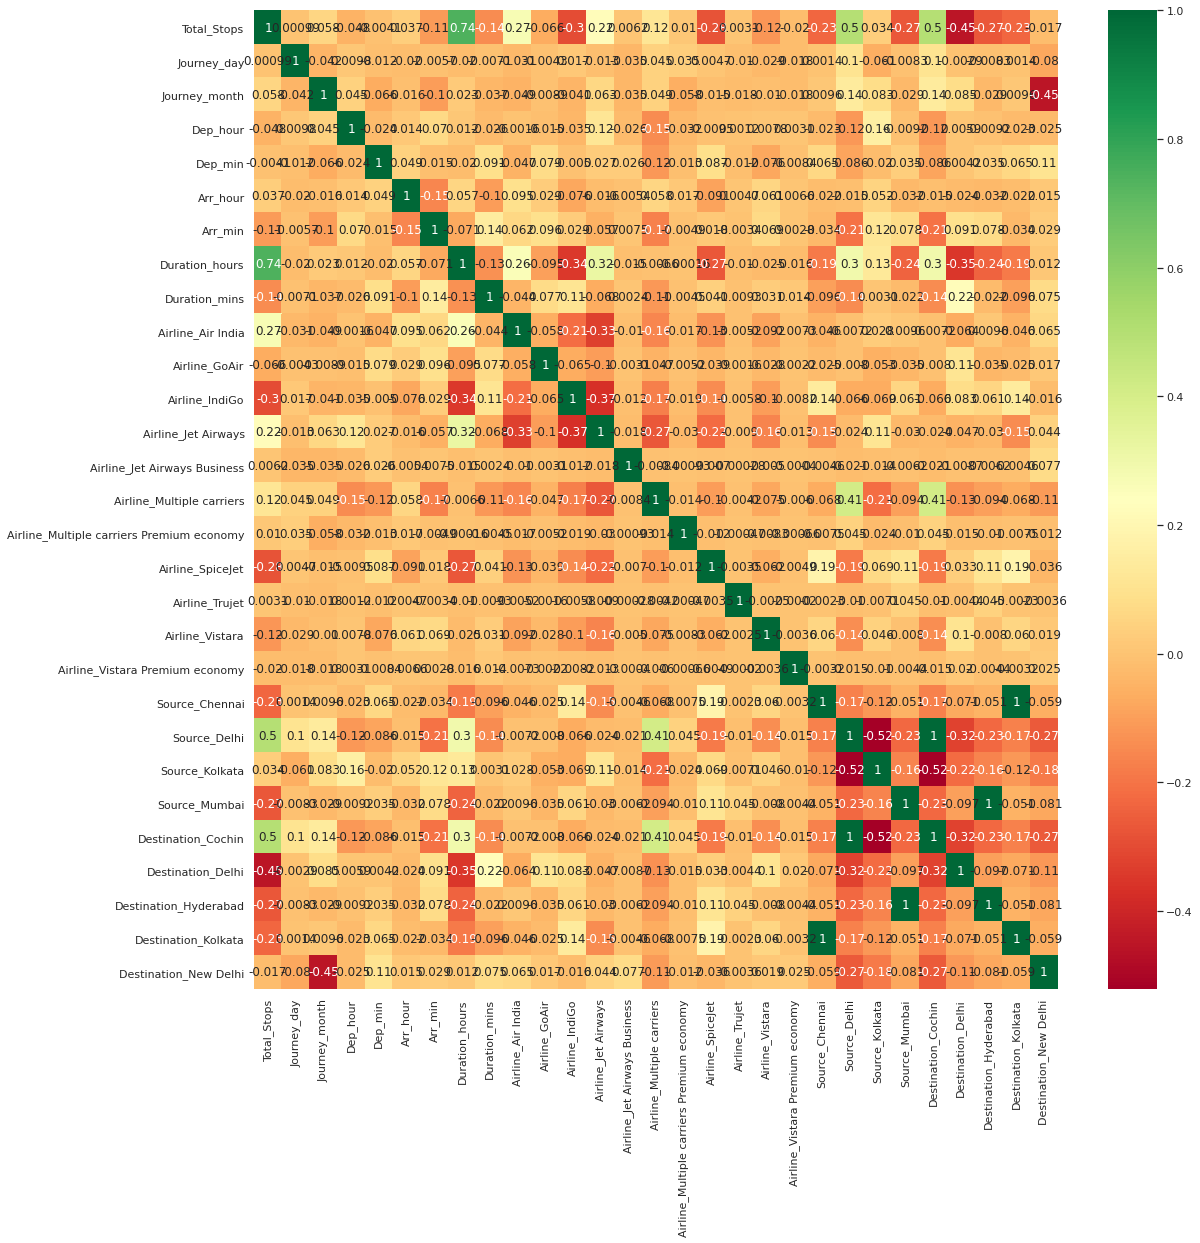

In [89]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(X_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [90]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [91]:
print(selection.feature_importances_)

[2.59904131e-01 1.39371672e-01 5.04622274e-02 2.47186960e-02
 2.24578578e-02 2.47218165e-02 1.94708484e-02 1.07555115e-01
 1.75641757e-02 8.59084494e-03 1.74841272e-03 2.03521197e-02
 1.37941894e-01 7.85694576e-02 1.70683398e-02 9.18175511e-04
 3.12572503e-03 2.40019805e-04 3.70460460e-03 1.18135611e-04
 5.40868634e-04 5.69611965e-03 3.16170895e-03 5.08775461e-03
 4.38194030e-03 1.18515119e-02 4.01130618e-03 5.83125814e-04
 2.60813952e-02]


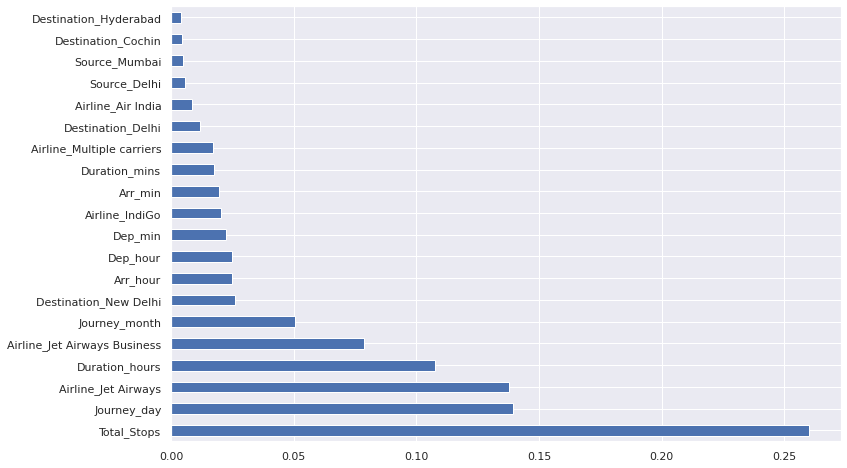

In [92]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [93]:
X_train.drop(["Airline_Trujet"], axis = 1, inplace = True)

In [94]:
#Creating the Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [95]:
#Creating y_pred
y_pred = reg_rf.predict(X_test)

In [96]:
#Predicting the training set performance score
reg_rf.score(X_train, y_train)

0.9564533122755636

In [97]:
#Predicting the test set performance score
reg_rf.score(X_train, y_train)

0.9564533122755636

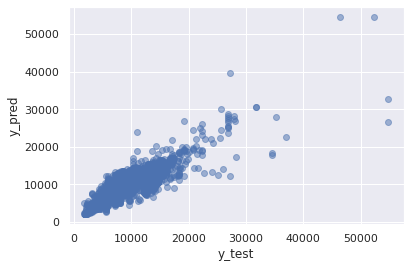

In [98]:
#Visualising the results
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#Hyperparameter Tuning¶
1. Choose following method for hyperparameter tuning
 1. RandomizedSearchCV --> Fast
 2. GridSearchCV
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
#Finding the best parameters
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [104]:
#Training with best parameters
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 700, max_depth = 20, min_samples_split = 15, min_samples_leaf = 1, max_features = 'auto')
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
y_pred = reg_rf.predict(X_test)

In [106]:
reg_rf.score(X_train, y_train)

0.8986117069219253

In [107]:
reg_rf.score(X_test, y_test)

0.82082537257168

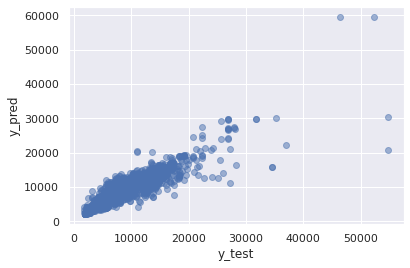

In [108]:
#Visualising the results
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()